# Evaluación extracción JSON

## Analisis de datos de los resultados de la evaluación

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [5]:
path = "../data/results/json_evaluation.csv"
df = pd.read_csv(path)
df.head()

,plain_levenshtein,accuracy,precision,recall,levenshtein_mean,total_correct,missing_keys,extra_keys,total_mismatches,total_keys,total_similarity_comparisons,mismatch_details,similarity_scores,document,method
0,0.375015,0.103448,0.187500,0.187500,0.965976,3,13,13,1,29,4,"[{'path': 'producto.composicion', 'expected': ...","[{'path': 'producto.composicion', 'similarity'...",ES-00006,gpt
1,0.590817,0.342105,0.565217,0.464286,0.860340,26,30,20,7,76,27,"[{'path': 'producto.composicion[0].forma', 'ex...",[{'path': 'producto.composicion[0].ingrediente...,ES-00006,gpt_schema
2,0.358905,0.031250,0.058824,0.062500,1.000000,1,15,16,0,32,1,[],"[{'path': 'producto.estado', 'similarity': 1.0...",ES-00006,gemini
3,0.556391,0.238095,0.416667,0.357143,0.881870,20,36,28,7,84,27,"[{'path': 'producto.composicion[0].forma', 'ex...",[{'path': 'producto.composicion[0].ingrediente...,ES-00006,gemini_schema
4,0.339525,0.000000,0.000000,0.000000,0.000000,0,1,12,0,13,0,[],[],ES-00006,llama


## Correlación de métricas

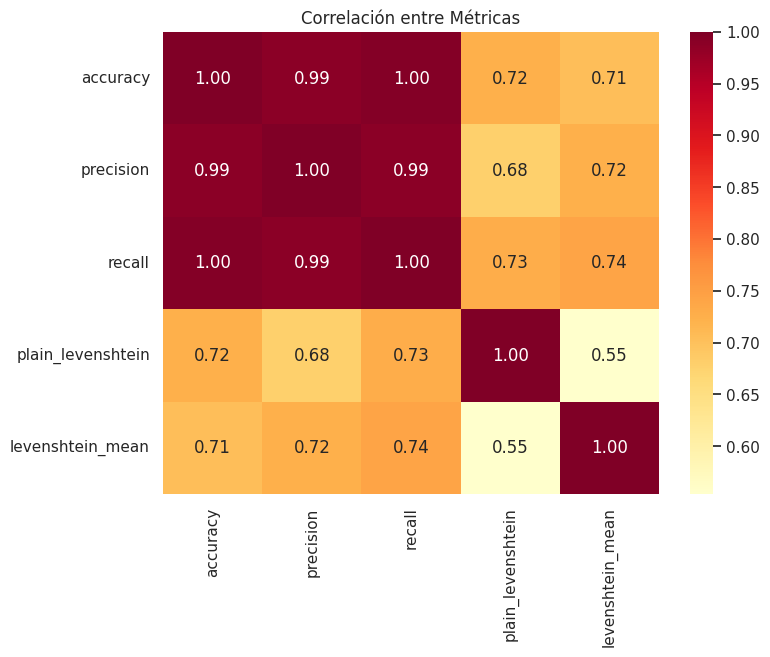

In [7]:
metricas = ["accuracy", "precision", "recall", "plain_levenshtein", "levenshtein_mean"]
correlaciones = df[metricas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Correlación entre Métricas")
plt.show()

## Comparación de métricas relevantes para cada modelo

In [8]:
df.groupby('method')["plain_levenshtein"].describe()[['mean','std']].style.background_gradient(
    axis=1, subset=['mean', 'std'], vmin=0, vmax=0.6, cmap='YlOrRd'
)

,mean,std
method,,
gemini,0.383404,0.092418
gemini_schema,0.526637,0.143484
gpt,0.417744,0.083680
gpt_schema,0.545696,0.172887
llama,0.388151,0.094035
llama_schema,0.543495,0.124962


In [ ]:
df.groupby('method')["accuracy"].describe()[['mean','std']].style.background_gradient(
    axis=1, subset=['mean', 'std'], vmin=0, vmax=0.6, cmap='YlOrRd'
)

,mean,std
method,,
gemini,0.020545,0.028346
gemini_schema,0.236705,0.126364
gpt,0.054858,0.058257
gpt_schema,0.350406,0.105902
llama,0.000000,0.000000
llama_schema,0.246167,0.076936


In [ ]:
df.groupby('method')["levenshtein_mean"].describe()[['mean','std']].style.background_gradient(
    axis=1, subset=['mean', 'std'], vmin=0, vmax=1, cmap='YlOrRd'
)

,mean,std
method,,
gemini,0.455345,0.470431
gemini_schema,0.739082,0.256902
gpt,0.470489,0.497581
gpt_schema,0.738665,0.275210
llama,0.000000,0.000000
llama_schema,0.703412,0.225328


/tmp/ipykernel_8413/1975299396.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="method", y="accuracy", palette="viridis")
/tmp/ipykernel_8413/1975299396.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="method", y="levenshtein_mean", palette="viridis")


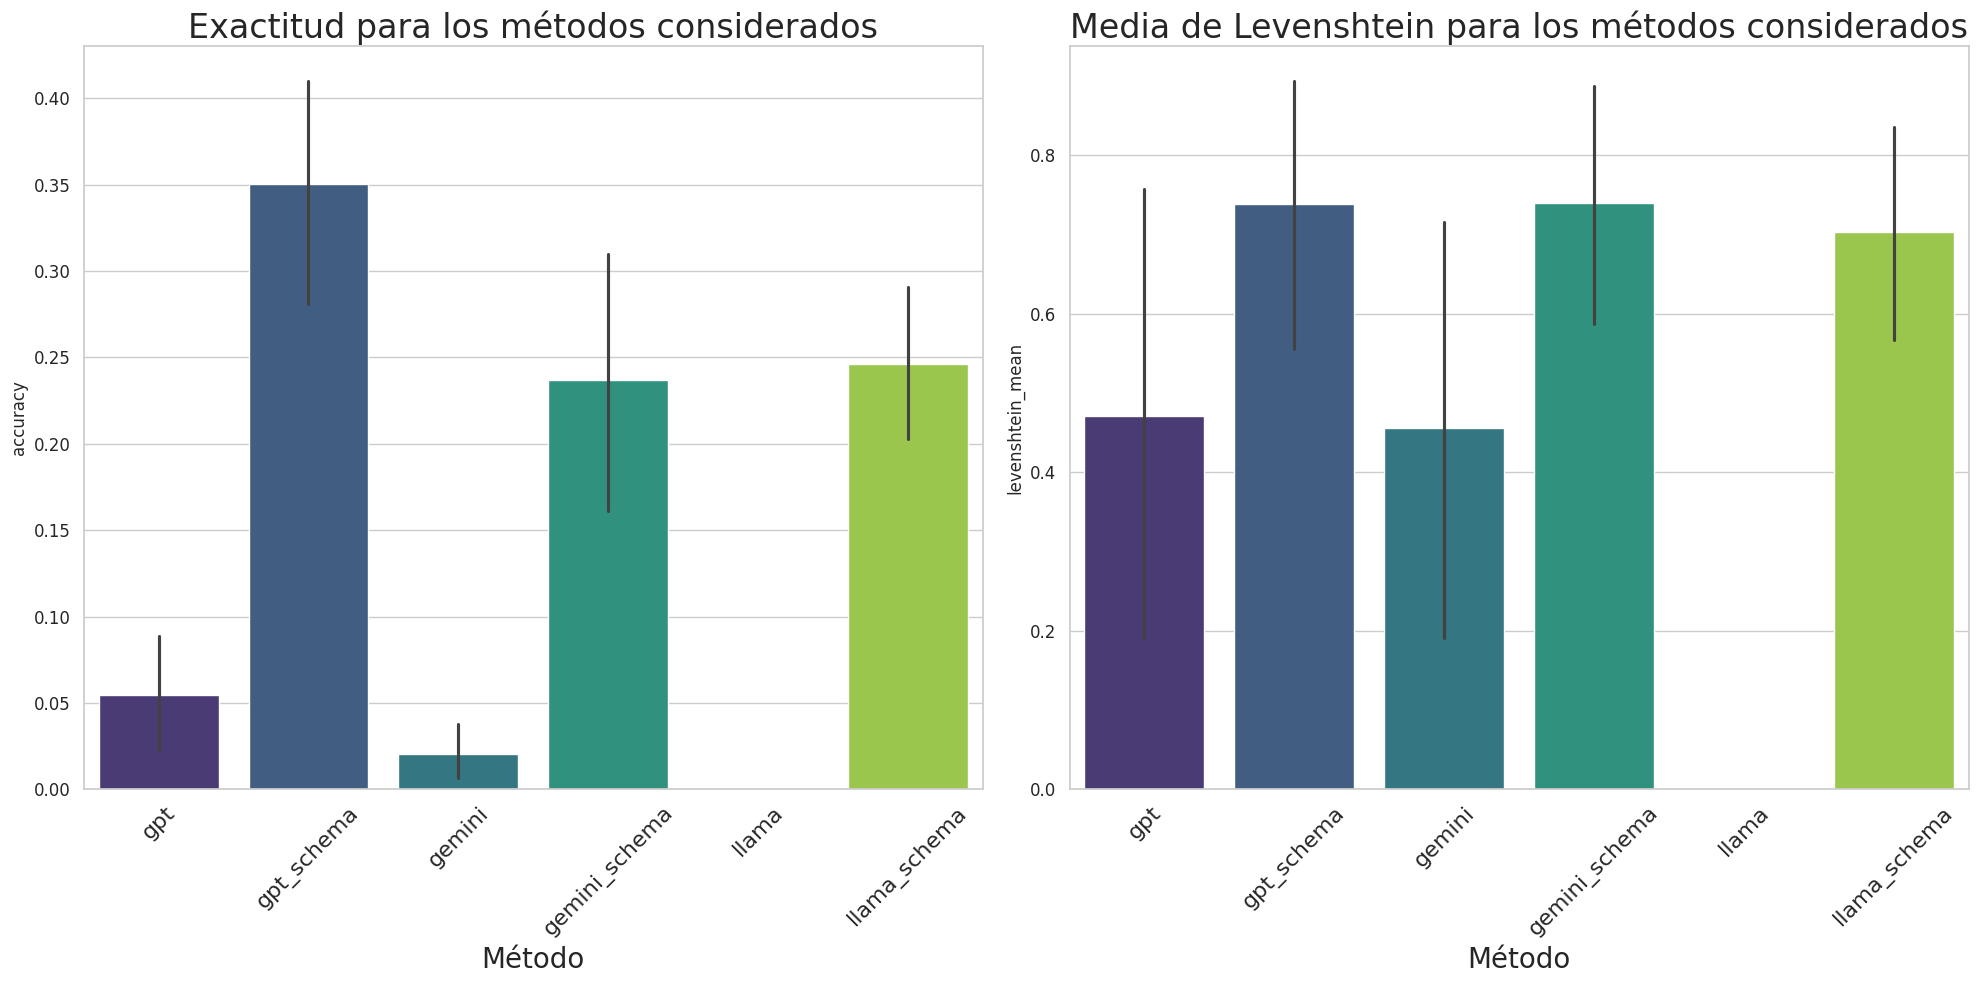

In [17]:
metricas = ["accuracy", "levenshtein_mean"]

# Crear subplots
plt.figure(figsize=(20, 10))

# Gráfico para "accuracy"
plt.subplot(1, 2, 1)  # Cambié de (1, 1, 1) a (1, 2, 1)
sns.barplot(data=df, x="method", y="accuracy", palette="viridis")
plt.title("Exactitud para los métodos considerados", fontsize=24)
plt.xlabel("Método", fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=12)

# Gráfico para "levenshtein_mean"
plt.subplot(1, 2, 2)  # Cambié de (1, 1, 2) a (1, 2, 2)
sns.barplot(data=df, x="method", y="levenshtein_mean", palette="viridis")
plt.title("Media de Levenshtein para los métodos considerados", fontsize=24)
plt.xlabel("Método", fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

***
## Con esquema vs Sin esquema

/tmp/ipykernel_1629/3275411543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="model_type", y="accuracy", palette="viridis")


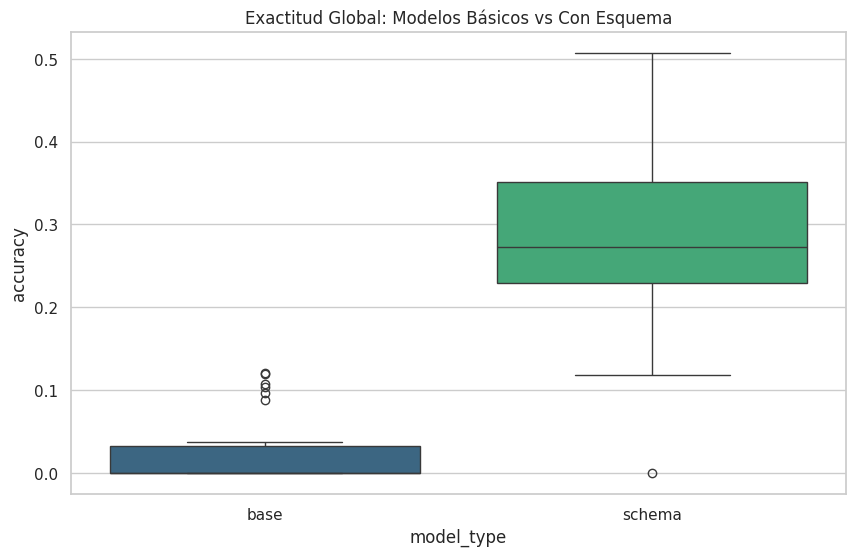

In [90]:
df['model_type'] = df['method'].apply(lambda x: 'schema' if 'schema' in x else 'base')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="model_type", y="accuracy", palette="viridis")
plt.title("Exactitud Global: Modelos Básicos vs Con Esquema")
plt.show()

## Por documento

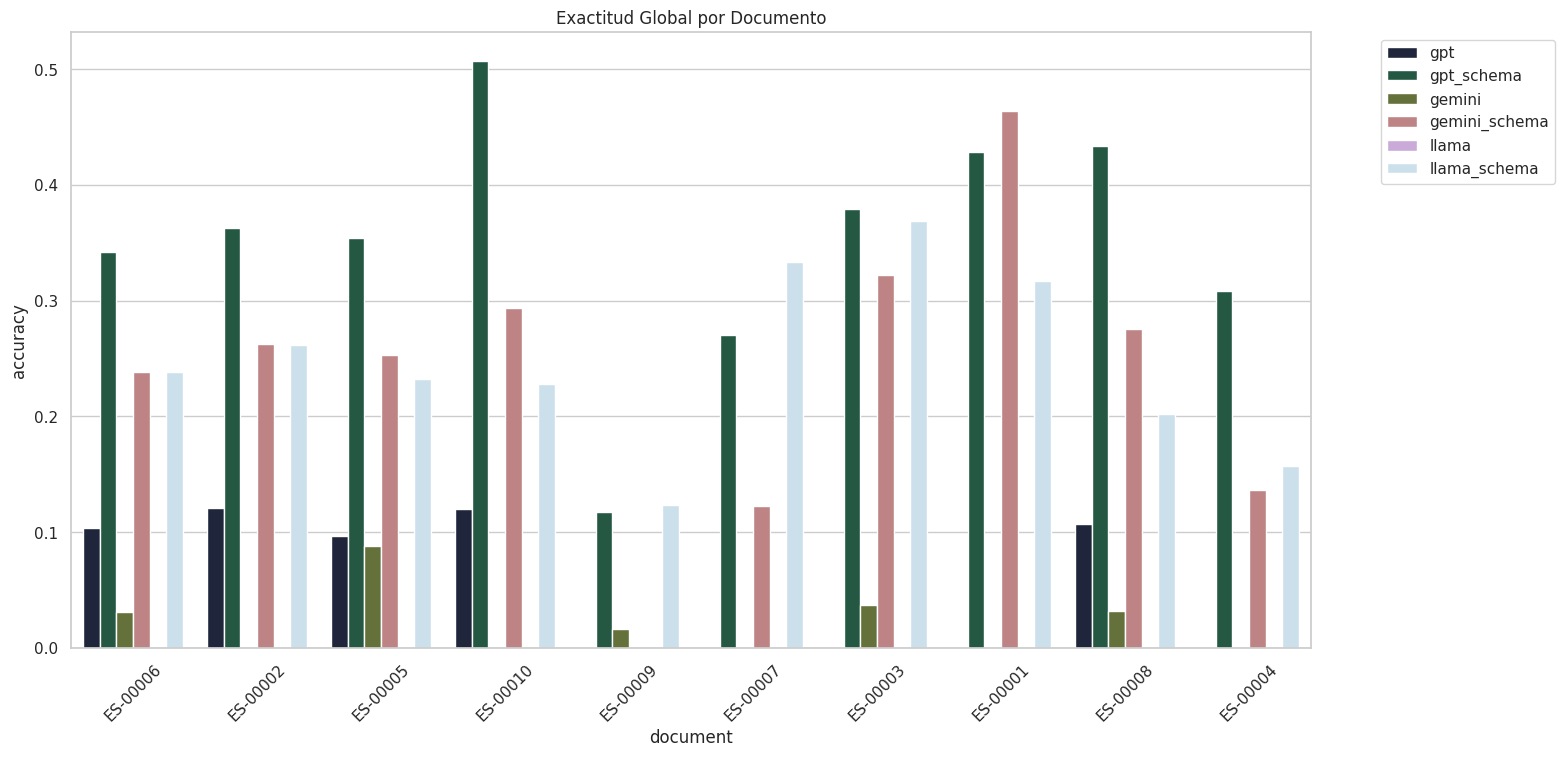

In [47]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x="document", y="accuracy", hue="method", palette="cubehelix")
plt.title("Exactitud Global por Documento")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
pivot_table = df.pivot_table(
    index='document', 
    columns='method', 
    values='accuracy'
)

d = dict(selector="th",
    props=[('text-align', 'center')])

pivot_table.style.background_gradient(
    axis=None, cmap='YlOrRd', vmin=0, vmax=1
    ).set_properties(**{'width':'8em', 'text-align':'center'})\
    .set_table_styles([d])

method,gemini,gemini_schema,gpt,gpt_schema,llama,llama_schema
document,,,,,,
ES-00001,0.000000,0.463768,0.000000,0.428571,0.000000,0.316667
ES-00002,0.000000,0.262500,0.121212,0.362500,0.000000,0.261905
ES-00003,0.037037,0.322034,0.000000,0.379310,0.000000,0.368421
ES-00004,0.000000,0.136364,0.000000,0.308642,0.000000,0.157303
ES-00005,0.088235,0.252874,0.096774,0.354430,0.000000,0.232558
ES-00006,0.031250,0.238095,0.103448,0.342105,0.000000,0.238095
ES-00007,0.000000,0.122222,0.000000,0.270270,0.000000,0.333333
ES-00008,0.032258,0.275862,0.107143,0.433735,0.000000,0.202247
ES-00009,0.016667,0.000000,0.000000,0.117647,0.000000,0.123288


In [88]:
pivot_table = df.pivot_table(
    index='document', 
    columns='method', 
    values='levenshtein_mean'
)
pivot_table.style.background_gradient(
    axis=None, cmap='YlOrRd', vmin=0, vmax=1
    ).set_properties(**{'width':'8em', 'text-align':'center'})\
    .set_table_styles([d])

method,gemini,gemini_schema,gpt,gpt_schema,llama,llama_schema
document,,,,,,
ES-00001,0.000000,0.890322,0.000000,0.839816,0.000000,0.633353
ES-00002,0.000000,0.855086,1.000000,0.881091,0.000000,0.848666
ES-00003,0.741379,0.920311,0.000000,0.949857,0.000000,0.923770
ES-00004,0.000000,0.444705,0.000000,0.490313,0.000000,0.444016
ES-00005,1.000000,0.894153,0.975714,0.861109,0.000000,0.870517
ES-00006,1.000000,0.881870,0.965976,0.860340,0.000000,0.928326
ES-00007,0.101266,0.512803,0.000000,0.411754,0.000000,0.517637
ES-00008,1.000000,0.935330,0.847619,0.974437,0.000000,0.819183
ES-00009,0.710804,0.200253,0.000000,0.179474,0.000000,0.274793


## Pruebas

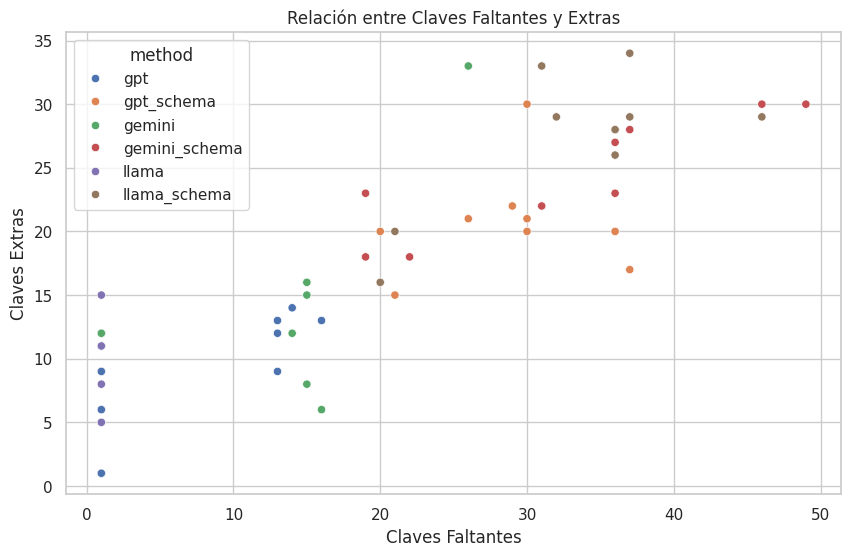

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="missing_keys", y="extra_keys", hue="method")
plt.title("Relación entre Claves Faltantes y Extras")
plt.xlabel("Claves Faltantes")
plt.ylabel("Claves Extras")
plt.show()

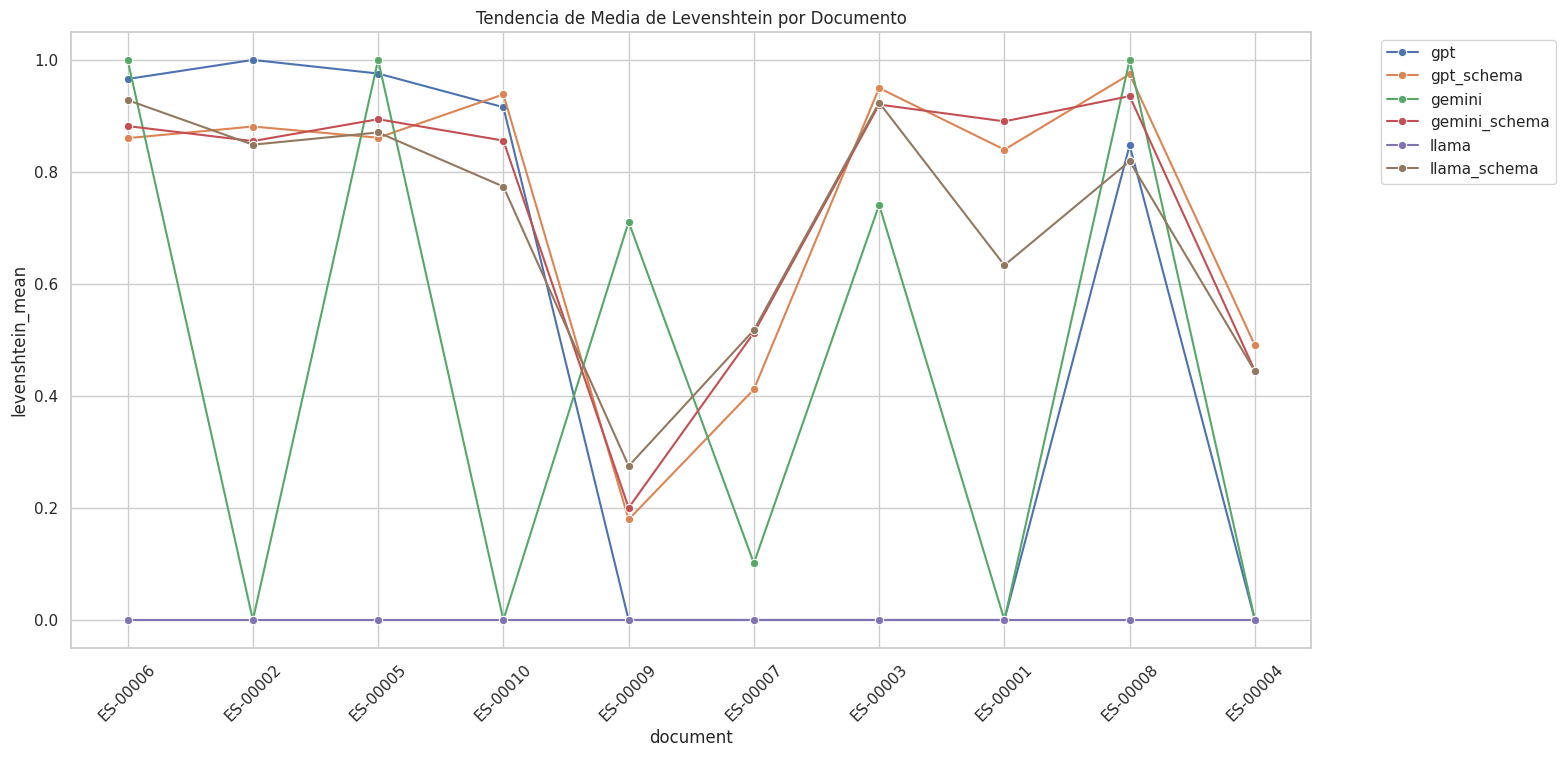

In [54]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x="document", y="levenshtein_mean", hue="method", marker="o")
plt.title("Tendencia de Media de Levenshtein por Documento")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

***
***
# Evaluación RAG

In [3]:
import pandas as pd

path = "../data/rag_evaluation.xlsx"
df = pd.read_excel(path)
df.head()

,Documento,Tipología,Numero,Pregunta,GPT-4o-mini,GPT-4o,Gemini-1.5-flash,Gemini-1.5,Llama-3.3-70B,Llama-3.3
0,BOE-A-2024-24346,Contenido General,1.0,¿Qué familias profesionales tienen nuevas cual...,Las familias profesionales que tienen nuevas c...,8.0,"Según el texto del Real Decreto 1023/2024, se ...",7.0,Se incluyen nuevas cualificaciones en las sigu...,10.0
1,BOE-A-2024-24346,Contenido General,2.0,¿Cuál es el objetivo principal del Real Decret...,El objetivo principal del Real Decreto 1023/20...,2.0,El texto proporcionado no contiene información...,2.0,El objetivo principal del Real Decreto 1023/20...,2.0
2,BOE-A-2024-24346,Contenido General,3.0,¿Qué competencias generales se requieren para ...,Para gestionar y supervisar el montaje de líne...,9.0,"Según el contexto proporcionado, la competenci...",10.0,Para gestionar y supervisar el montaje de líne...,9.0
3,BOE-A-2024-24346,Normativa Especifica,4.0,¿Qué cambios se han realizado en la cualificac...,Los cambios realizados en la cualificación pro...,7.0,El texto proporcionado describe la cualificaci...,4.0,No se mencionan cambios en la cualificación pr...,4.0
4,BOE-A-2024-24346,Normativa Especifica,5.0,¿Cómo se aborda la seguridad jurídica en este ...,La seguridad jurídica en este Real Decreto se ...,10.0,El Real Decreto se ajusta al principio de segu...,10.0,La seguridad jurídica en este Real Decreto se ...,10.0


In [4]:
df = df.query("Documento == 'BOE-A-2024-24346'").filter(["Tipología", "GPT-4o", "Gemini-1.5", "Llama-3.3"], axis=1)

In [5]:
df

,Tipología,GPT-4o,Gemini-1.5,Llama-3.3
0,Contenido General,8.0,7.0,10.0
1,Contenido General,2.0,2.0,2.0
2,Contenido General,9.0,10.0,9.0
3,Normativa Especifica,7.0,4.0,4.0
4,Normativa Especifica,10.0,10.0,10.0
5,Normativa Especifica,10.0,10.0,10.0
6,Detalle Tecnico,9.0,6.0,6.0
7,Detalle Tecnico,4.0,5.0,7.0
8,Interpretacion,3.0,3.0,4.0
9,Interpretacion,7.0,3.0,6.0


In [8]:
df.shape

(10, 6)

In [22]:
d = dict(selector="th",
    props=[('text-align', 'center')])

df.style.background_gradient(
    axis=None, cmap='YlOrRd', vmin=0, vmax=15,
    ).set_properties(**{'width':'10em', 'text-align':'center'})\
    .set_table_styles([d])\
    .format("{:.0f}", subset=["GPT-4o", "Gemini-1.5", "Llama-3.3"])

,Tipología,GPT-4o,Gemini-1.5,Llama-3.3
0,Contenido General,8,7,10
1,Contenido General,2,2,2
2,Contenido General,9,10,9
3,Normativa Especifica,7,4,4
4,Normativa Especifica,10,10,10
5,Normativa Especifica,10,10,10
6,Detalle Tecnico,9,6,6
7,Detalle Tecnico,4,5,7
8,Interpretacion,3,3,4
9,Interpretacion,7,3,6


In [28]:
# Tabla 1: Media de todas las preguntas para cada modelo
mean_table = df[["GPT-4o", "Gemini-1.5", "Llama-3.3"]].mean().to_frame().T
mean_table.style.background_gradient(axis=1, cmap='YlOrRd', vmin=0, vmax=15)\
    .set_properties(**{'width':'8em', 'text-align':'center'})\
    .set_table_styles([{
        'selector': 'th', 
        'props': [('text-align', 'center')]
    }])\
    .format("{:.2f}", subset=["GPT-4o", "Gemini-1.5", "Llama-3.3"])

,GPT-4o,Gemini-1.5,Llama-3.3
0,6.90,6.00,6.80


In [29]:
grouped_table = df.groupby("Tipología")[["GPT-4o", "Gemini-1.5", "Llama-3.3"]].mean()
grouped_table.style.background_gradient(axis=None, cmap='YlOrRd', vmin=0, vmax=15)\
    .set_properties(**{'width':'8em', 'text-align':'center'})\
    .set_table_styles([{
        'selector': 'th', 
        'props': [('text-align', 'center')]
    }])\
    .format("{:.2f}", subset=["GPT-4o", "Gemini-1.5", "Llama-3.3"])

,GPT-4o,Gemini-1.5,Llama-3.3
Tipología,,,
Contenido General,6.33,6.33,7.00
Detalle Tecnico,6.50,5.50,6.50
Interpretacion,5.00,3.00,5.00
Normativa Especifica,9.00,8.00,8.00
